In [2]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data for TEG is collected.

In [1]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/thermodynamics/heatcapacity/TEG.csv')
expdata_df

,ID,HeatCapacityCp,ComponentName,Temperature,Pressure,PhaseType,Reference
0,1,2.083632,TEG,273.15,1,liquid,Stephens1979
1,2,2.163128,TEG,293.15,1,liquid,Stephens1979
2,3,2.242624,TEG,313.15,1,liquid,Stephens1979
3,4,2.322120,TEG,333.15,1,liquid,Stephens1979
4,5,2.401616,TEG,353.15,1,liquid,Stephens1979
5,6,2.481112,TEG,373.15,1,liquid,Stephens1979
6,7,2.560608,TEG,393.15,1,liquid,Stephens1979
7,8,2.640104,TEG,413.15,1,liquid,Stephens1979
8,9,2.719600,TEG,433.15,1,liquid,Stephens1979
9,10,2.753072,TEG,441.15,1,liquid,Stephens1979


<Figure size 640x480 with 0 Axes>

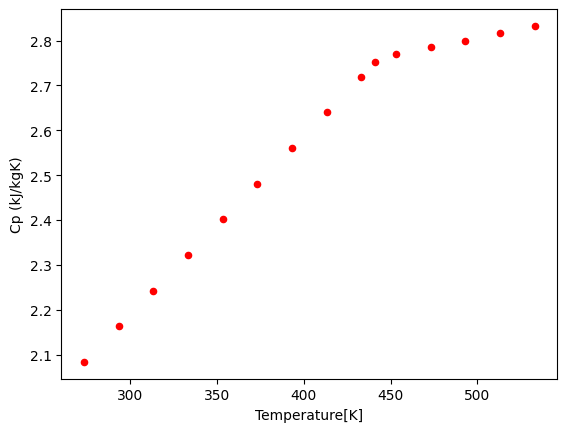

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='Temperature', y='HeatCapacityCp', kind='scatter',ylabel='Cp (kJ/kgK)', xlabel='Temperature[K]',color='red')

plt.show()

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations at 288.15 K

<Figure size 640x480 with 0 Axes>

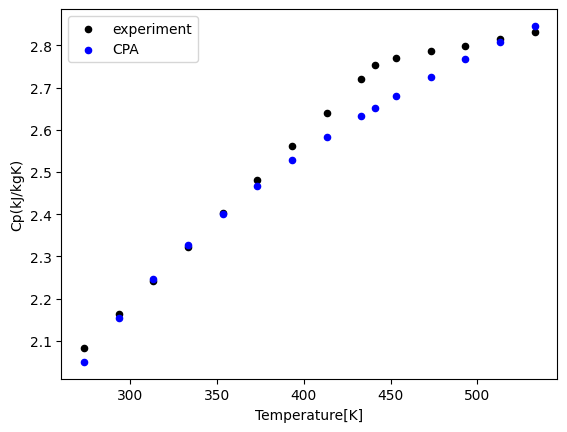

In [12]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('TEG', 1.0)
fluid1.setTemperature(15.0, 'C')
fluid1.setPressure(1.0, 'bara')

def density(temp):
    fluid1.setTemperature(temp, 'K')
    TPflash(fluid1)
    fluid1.initProperties()
    return fluid1.getPhase('aqueous').getCp('kJ/kgK')

temperatures = expdata_df['Temperature'].values.tolist()
cP_res = [density(T) for T in temperatures]

dataWithExperiment = expdata_df.assign(cP_res = cP_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='Temperature', y='HeatCapacityCp', kind='scatter',ylabel='Cp(kJ/kgK)', xlabel='Temperature[K]',color='black')	
dataWithExperiment.plot(ax=plot1, x='Temperature', y='cP_res', kind='scatter',ylabel='Cp(kJ/kgK)', xlabel='Temperature[K]',color='blue')	
plt.legend(['experiment', 'CPA'])
plt.show()

# Parameter fitting

## Manual fitting

## Automatic fitting